In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('wordnet')
nltk.download('stopwords')

import re
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pickle

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
fake_news = pd.read_csv('fake.csv')
fake_news = fake_news[['title', 'text','site_url']]
fake_news.head()

,title,text,site_url
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com


In [3]:
fake_news.isnull().sum()

title       680
text         46
site_url      0
dtype: int64

In [4]:
fake_news['site_url'] = fake_news['site_url'].apply(lambda x:x.split('.')[0])

fake_news['title'].fillna("", inplace=True)
fake_news.dropna(inplace=True)
fake_news['type'] = 'fake'
fake_news.columns = ['title','content','publication','type']
fake_news.isnull().sum()

title          0
content        0
publication    0
type           0
dtype: int64

In [5]:
fake_news.head()

,title,content,publication,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake


In [9]:
real_news = pd.read_csv('real.csv')
real_news = real_news[['title', 'content','publication']]
real_news['type'] = 'real'
real_news.columns = ['title','content','publication','type']
real_news.head()

,title,content,publication,type
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real


In [10]:
real_news.isnull().sum()

title          0
content        0
publication    0
type           0
dtype: int64

In [11]:
print(fake_news.shape)
print(real_news.shape)

(12953, 4)
(15712, 4)


In [12]:
df = pd.concat([fake_news, real_news])
df.reset_index(drop=True, inplace=True)
df.head()

,title,content,publication,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake


In [13]:
df.shape

(28665, 4)

Text(0.5, 0, 'Category')

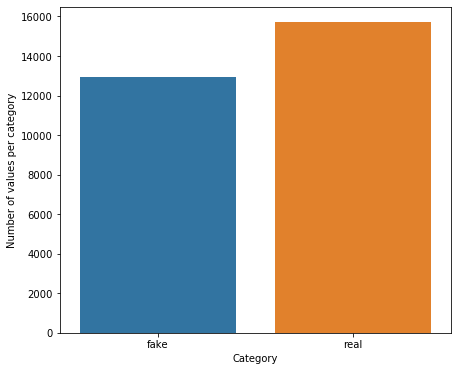

In [14]:
f = plt.figure(figsize=(7,6))
sns.countplot(x='type', data=df)

# df['type'].value_counts().plot.bar(figsize=(7,6))
plt.ylabel('Number of values per category')
plt.xlabel('Category')



In [15]:
# f.savefig("value_counts.pdf", bbox_inches='tight')

In [16]:
from nltk.tokenize import sent_tokenize

def avg_sen_len(x):
    words = sent_tokenize(x)
    if len(words) != 0:
        avg = sum(len(word) for word in words) / len(words)
        return round(avg,2)
    else:
        return 0

df['avg_sent_len'] = df['content'].apply(avg_sen_len)

df

,title,content,publication,type,avg_sent_len
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake,71.00
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake,147.83
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake,150.44
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake,66.75
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake,109.11
...,...,...,...,...,...
28660,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real,95.98
28661,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real,99.00
28662,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real,137.24
28663,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real,127.69


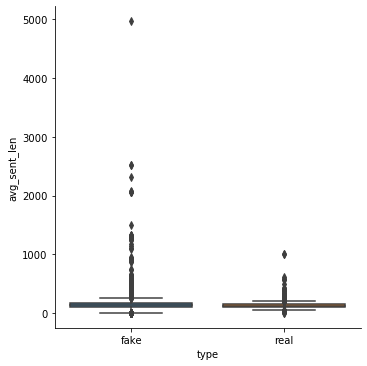

In [20]:
sns.catplot(x="type", y="avg_sent_len", data=df, kind="box",);

In [21]:
df['title_len'] = df['title'].apply(len)
df['content_len'] = df['content'].apply(len)

df['title_uppercase_len'] = df['title'].apply(lambda x:len(re.findall('([A-Z])', x)))
df['content_uppercase_len'] = df['content'].apply(lambda x:len(re.findall('([A-Z])', x)))
df['title_punc_len'] = df['title'].apply(lambda x:len(re.sub(r'[\w\s]','',x)))
df['content_punc_len'] = df['content'].apply(lambda x:len(re.sub(r'[\w\s]','',x)))

df['content'] = df['title']+', '+df['content']

In [22]:
df.head()

,title,content,publication,type,avg_sent_len,title_len,content_len,title_uppercase_len,content_uppercase_len,title_punc_len,content_punc_len
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Muslims BUSTED: They Stole Millions In Gov’t B...,100percentfedup,fake,71.00,53,505,13,12,2,11
1,Re: Why Did Attorney General Loretta Lynch Ple...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup,fake,147.83,59,1789,10,68,2,53
2,BREAKING: Weiner Cooperating With FBI On Hilla...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup,fake,150.44,68,1363,18,37,1,40
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,100percentfedup,fake,66.75,125,271,44,14,7,6
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup,fake,109.11,99,2095,32,91,5,37


<Figure size 1152x720 with 0 Axes>

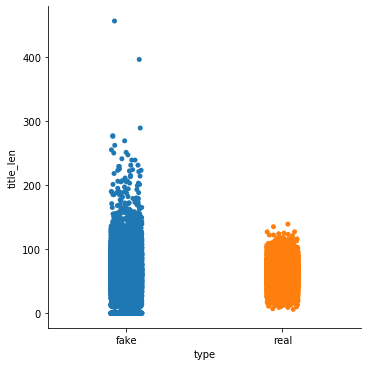

In [23]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.catplot(x="type", y="title_len", data=df);

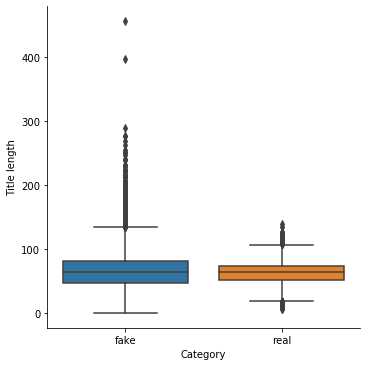

In [33]:
f = sns.catplot(x="type", y="title_len", kind="box", data=df);
plt.ylabel("Title length")
plt.xlabel("Category");

f.savefig("title_len.pdf", bbox_inches='tight')

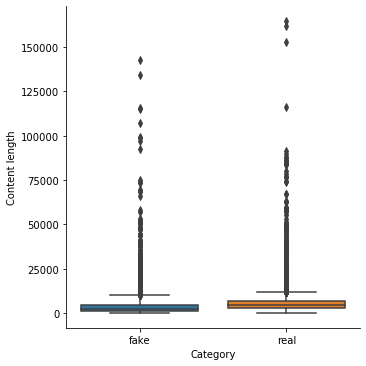

In [34]:
f = sns.catplot(x="type", y="content_len", data=df, kind="box");
plt.ylabel("Content length")
plt.xlabel("Category");

f.savefig("content_len.pdf", bbox_inches='tight')

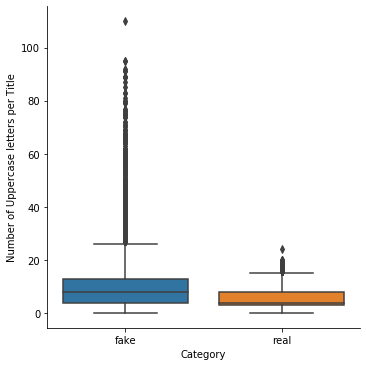

In [35]:
f = sns.catplot(x="type", y="title_uppercase_len", data=df, kind="box");
plt.ylabel("Number of Uppercase letters per Title")
plt.xlabel("Category");

f.savefig("title_uppercase_len.pdf", bbox_inches='tight')

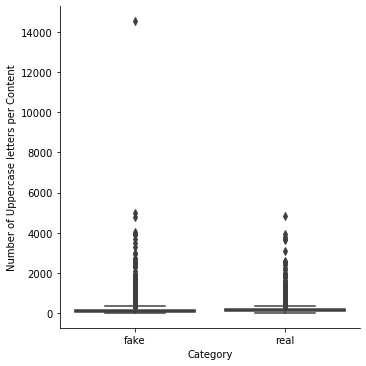

In [36]:
f = sns.catplot(x="type", y="content_uppercase_len", data=df, kind="box");
plt.ylabel("Number of Uppercase letters per Content")
plt.xlabel("Category");

f.savefig("content_uppercase_len.pdf", bbox_inches='tight')

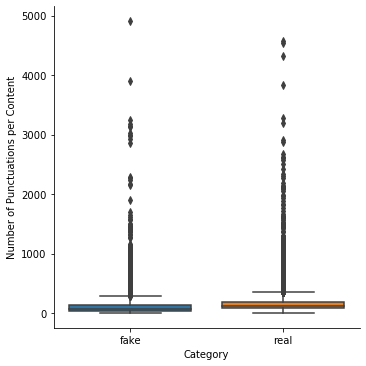

In [37]:
f = sns.catplot(x="type", y="content_punc_len", data=df, kind="box");

plt.ylabel("Number of Punctuations per Content")
plt.xlabel("Category");

f.savefig("content_punc_len.pdf", bbox_inches='tight')

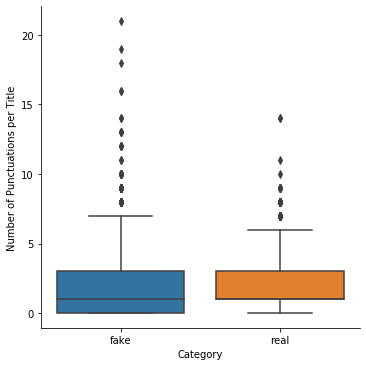

In [38]:
f = sns.catplot(x="type", y="title_punc_len", data=df, kind="box");

plt.ylabel("Number of Punctuations per Title")
plt.xlabel("Category");

f.savefig("title_punc_len.pdf", bbox_inches='tight')

### Text Preprocessing

In [21]:
ps = WordNetLemmatizer()

In [22]:
def pre_processing_text(x):
    
    review = re.sub('[^a-zA-Z]', ' ', str(x)) # removing sepcial characters and numbers
    review = review.lower() # lowering the text
    review = review.split() 
    # removing stopwords and lemmatization
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] 
    review = ' '.join(review)
    
    return review

In [23]:
df['content'] = df['content'].apply(pre_processing_text)

In [24]:
df['content_len_per'] = (df['content_len'] / sum(df['content_len'])) * 100
df['content_uppercase_len_per'] = (df['content_uppercase_len'] / sum( df['content_uppercase_len'])) * 100
df['content_punc_len_per'] = (df['content_punc_len'] / sum( df['content_punc_len'])) * 100

df['title_len_per'] = (df['title_len'] / sum(df['title_len'])) * 100
df['title_uppercase_len_per'] = (df['title_uppercase_len'] / sum( df['title_uppercase_len'])) * 100
df['title_punc_len_per'] = (df['title_punc_len'] / sum( df['title_punc_len'])) * 100

df['avg_sent_len_per'] = (df['avg_sent_len'] / sum( df['avg_sent_len'])) * 100

df.head()

,title,content,publication,type,avg_sent_len,title_len,content_len,title_uppercase_len,content_uppercase_len,title_punc_len,content_punc_len,content_len_per,content_uppercase_len_per,content_punc_len_per,title_len_per,title_uppercase_len_per,title_punc_len_per,avg_sent_len_per
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Muslims BUSTED: They Stole Millions In Gov’t B...,100percentfedup,fake,71.00,53,505,13,12,51,494,0.000361,0.000271,0.000364,0.002902,0.006130,0.002869,0.001778
1,Re: Why Did Attorney General Loretta Lynch Ple...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup,fake,147.83,59,1789,10,68,57,1736,0.001279,0.001536,0.001279,0.003230,0.004715,0.003207,0.003703
2,BREAKING: Weiner Cooperating With FBI On Hilla...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup,fake,150.44,68,1363,18,37,67,1323,0.000975,0.000836,0.000974,0.003723,0.008488,0.003769,0.003768
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,100percentfedup,fake,66.75,125,271,44,14,118,265,0.000194,0.000316,0.000195,0.006844,0.020747,0.006639,0.001672
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup,fake,109.11,99,2095,32,91,94,2058,0.001498,0.002056,0.001516,0.005421,0.015089,0.005288,0.002733


In [25]:
# save the pre-processing data
with open('preprocessed_fake_real_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)